**Forecasting Stock Prices Using Time Series, Machine Learning, and Deep Learning Models**

*Introduction*

Forecasting stock prices is an increasingly critical and challenging task in financial markets due to the inherent volatility and complex dynamics of stock data. Accurate predictions enable investors, analysts, and policymakers to make informed decisions, minimizing risks and maximizing returns. The unpredictability of financial markets, compounded by various macroeconomic and geopolitical factors, makes forecasting stock prices both a science and an art. Traditional approaches such as the Autoregressive Integrated Moving Average (ARIMA) have long been the foundation of time series forecasting, providing robust predictions in stationary and linear contexts. However, the limitations of these methods in capturing non-linear and non-stationary patterns have driven a shift towards advanced machine learning and deep learning techniques, which are better suited to handle complex, high-dimensional datasets (Chatterjee et al., 2021; Yamak et al., 2019; Siami-Namini et al., 2019).

Modern methods like Long Short-Term Memory (LSTM) networks and Bidirectional LSTM (BiLSTM) have demonstrated superior capabilities in modelling long-term dependencies and non-linear patterns in financial data (Lawi et al., 2022). These architectures excel in recognizing temporal dependencies, making them highly effective for sequential data analysis. Additionally, models like Prophet, N-BEATS, and DeepAR have introduced innovations tailored for financial forecasting, leveraging probabilistic modelling, neural architectures, and attention mechanisms to enhance predictive accuracy (Salinas et al., 2020; Oreshkin et al., 2019; Taylor and Letham, 2018). Emerging techniques such as Temporal Convolutional Networks (TCN) and hybrid architectures combining GRU and attention mechanisms also offer promising alternatives, improving both efficiency and accuracy in processing large-scale data (Chen et al., 2024).

This study focuses on the forecasting of stock prices for ten leading companies: Microsoft Corp., Nvidia Corp., Alphabet Inc., Amazon.com Inc., Meta Platforms Inc., Taiwan Semiconductor Manufacturing Co. Ltd., ASML Holding NV, Adobe Inc., IBM, and Arista Networks Inc. These companies represent a significant portion of the technological and innovation-driven economy, often serving as indicators of broader market trends. Using data collected via the Yahoo Finance API, this research employs various forecasting models, including ARIMA, LSTM, BiLSTM, N-BEATS, Prophet, DeepAR, and TCN. Each model's effectiveness will be rigorously compared to identify the most suitable approach for stock price prediction (Pant et al., 2024).

Objectives

The objectives of this project are as follows:

- To evaluate and compare the performance of multiple time series forecasting models, including traditional, machine learning, and deep learning approaches, in predicting stock prices.

- To identify the most suitable forecasting model for predicting stock prices of the selected companies based on accuracy, robustness, and computational efficiency.

*Who Will Benifit*

The findings of this project will benefit the following stakeholders:

- Investors: By providing accurate predictions, investors can make more informed decisions about buying, holding, or selling stocks, thereby minimizing risks and maximizing returns. This project will also help retail investors understand the application of advanced predictive models.

- Financial Analysts: The study will offer a comparative analysis of forecasting models, helping analysts understand the strengths and limitations of different approaches, thereby enhancing their analytical toolkits.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


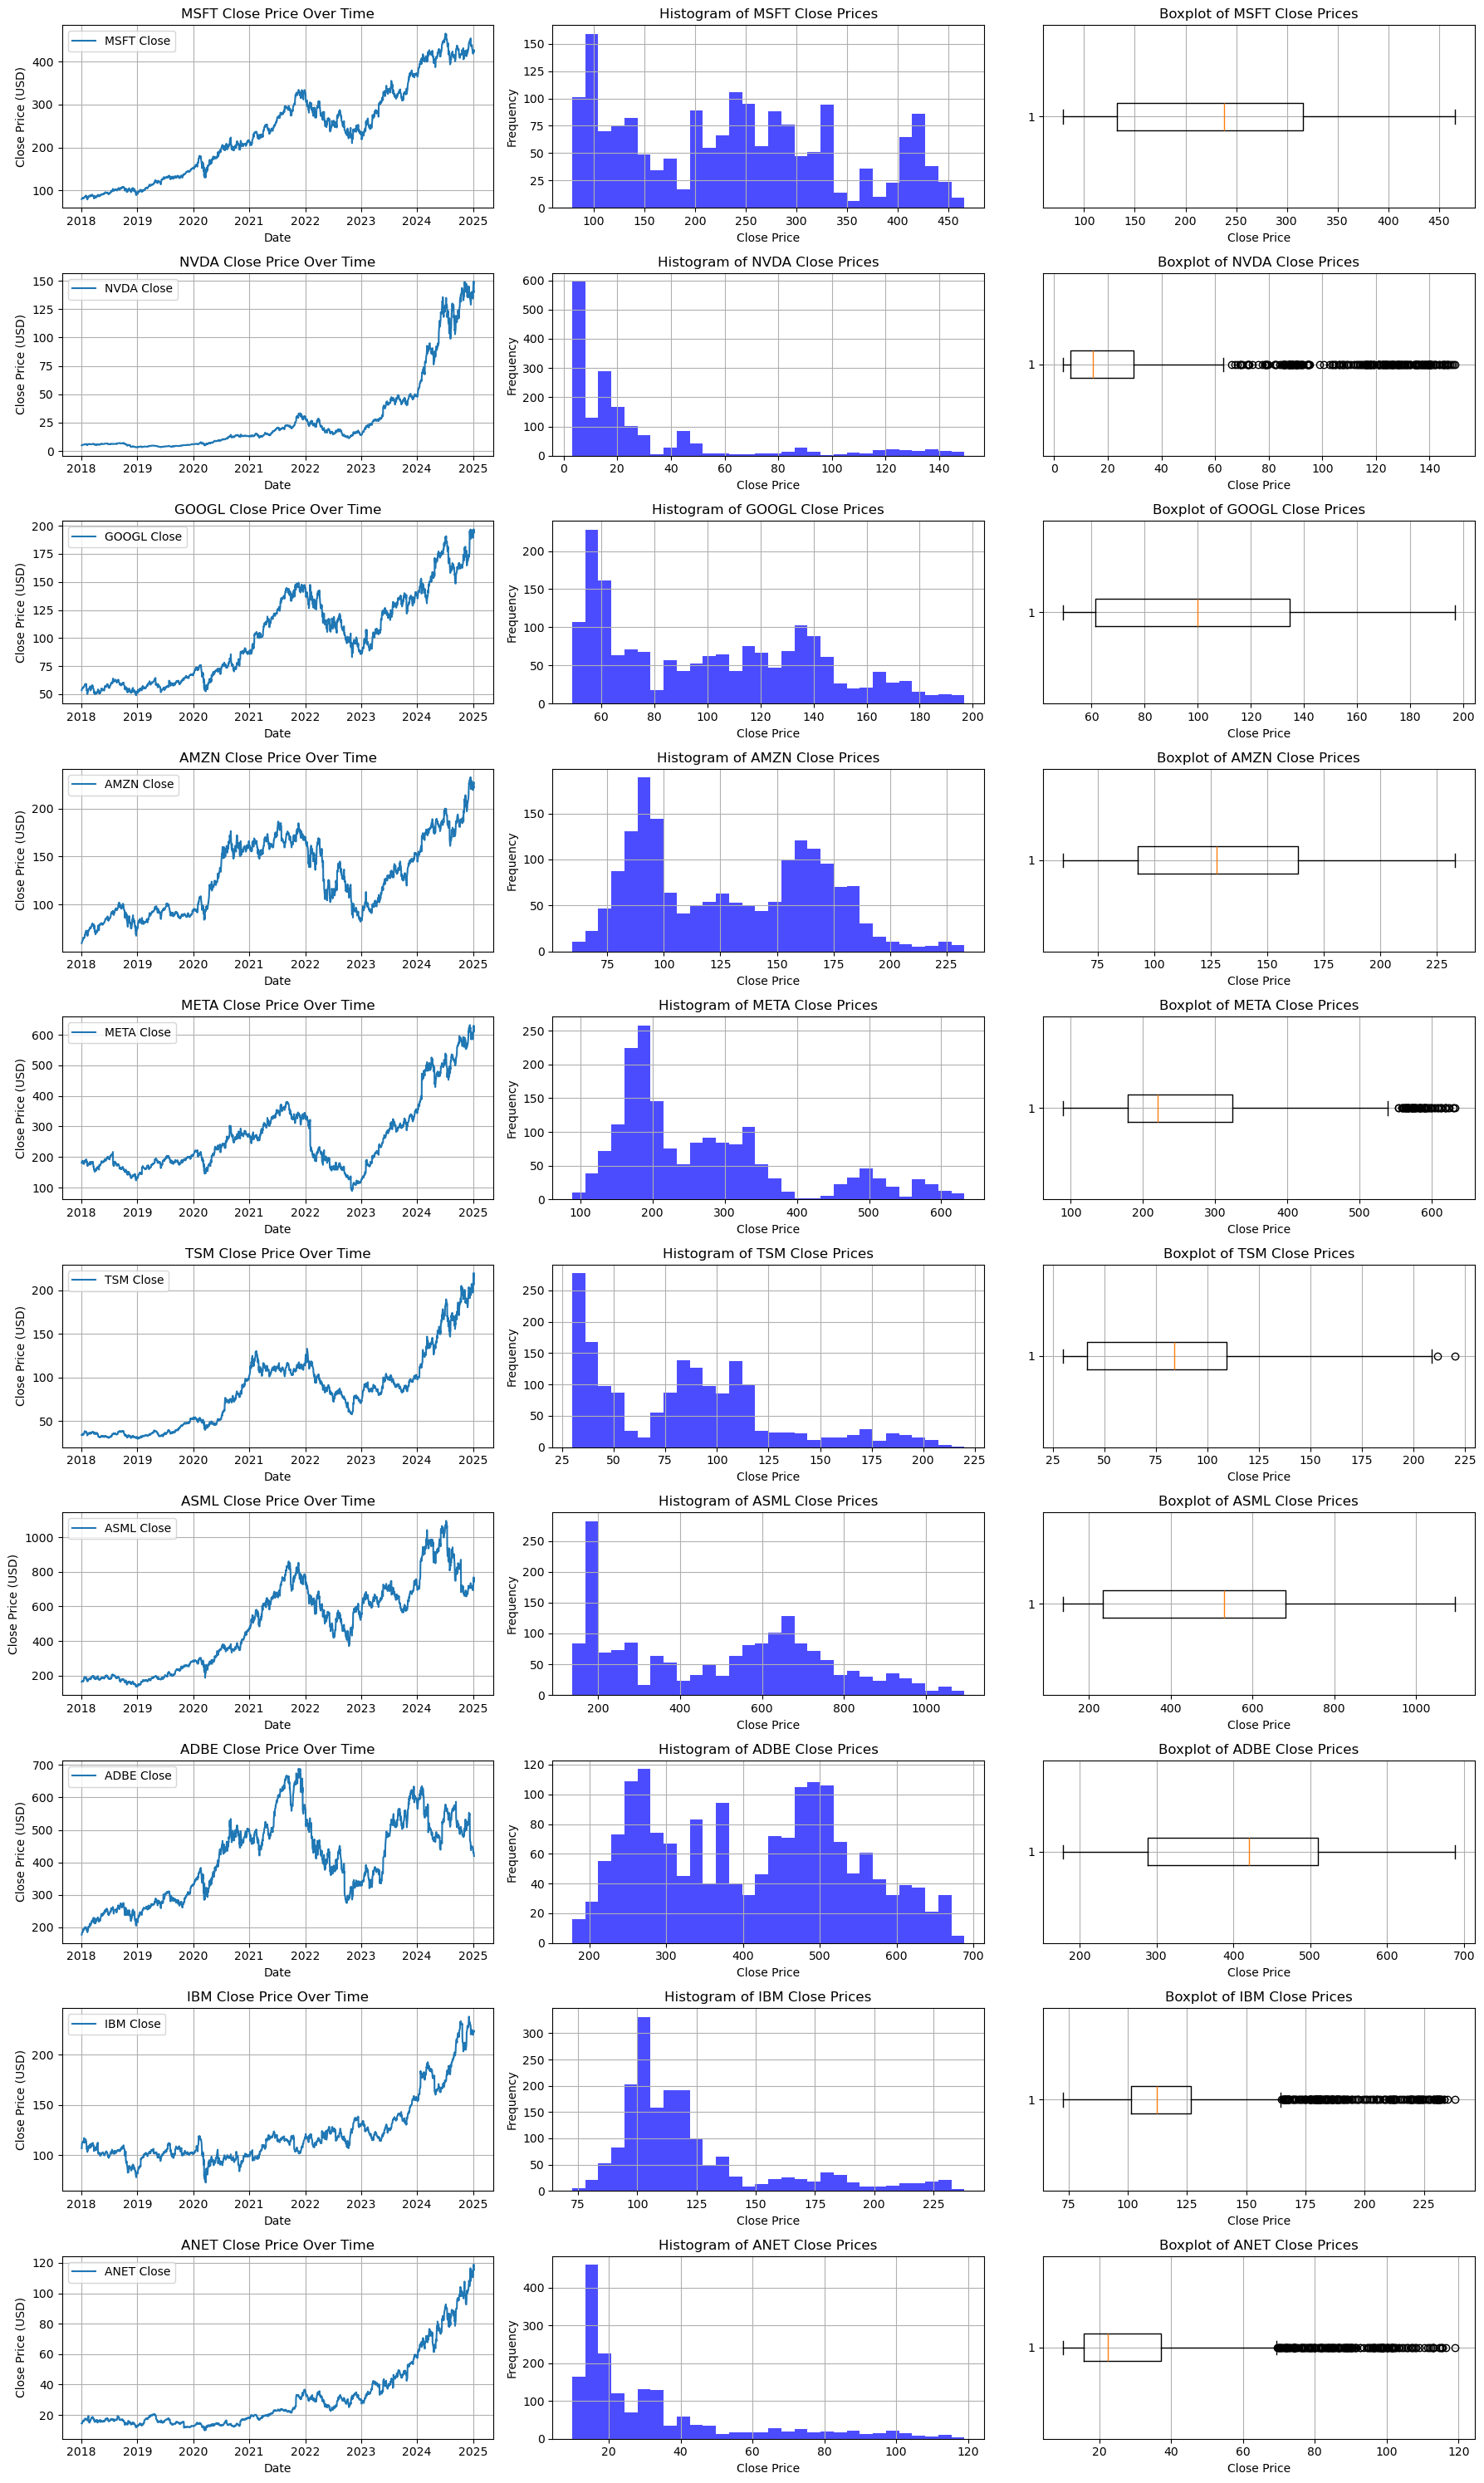

Summary statistics for all tickers:
Ticker         MSFT         NVDA        GOOGL         AMZN         META  \
count   1766.000000  1766.000000  1766.000000  1766.000000  1766.000000   
mean     238.254449    29.226992   101.505730   129.575131   265.875793   
std      107.600587    36.125098    39.187039    39.136024   121.301526   
min       78.762619     3.151429    49.055672    59.450500    88.571663   
25%      132.595963     6.155447    61.539914    92.765999   178.590298   
50%      237.860786    14.597883    99.867966   127.420002   219.979691   
75%      316.248444    29.735649   134.616882   163.551746   323.491783   
max      465.786438   149.429993   196.869995   232.929993   632.170044   

Ticker          TSM         ASML         ADBE          IBM         ANET  
count   1766.000000  1766.000000  1766.000000  1766.000000  1766.000000  
mean      84.093006   495.297982   411.172305   122.078528    32.244345  
std       43.320689   251.286904   127.421847    32.899966    24.2

In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# tickers
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2018-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()   
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data

# Download the data
data_df = download_data(tickers, start_date)

# storing the data in a csv file
#data_df.to_csv('data.csv')

# a grid layout of the plots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18, 30))
axes = axes.flatten()

# plots
for i, ticker in enumerate(tickers):
    # Line plot
    axes[i*3].plot(data_df.index, data_df[ticker], label=f"{ticker} Close")
    axes[i*3].set_title(f"{ticker} Close Price Over Time")
    axes[i*3].set_xlabel("Date")
    axes[i*3].set_ylabel("Close Price (USD)")
    axes[i*3].legend()
    axes[i*3].grid()

    # histogram
    axes[i*3+1].hist(data_df[ticker].dropna(), bins=30, color='blue', alpha=0.7)
    axes[i*3+1].set_title(f"Histogram of {ticker} Close Prices")
    axes[i*3+1].set_xlabel("Close Price")
    axes[i*3+1].set_ylabel("Frequency")
    axes[i*3+1].grid()

    # boxplot
    axes[i*3+2].boxplot(data_df[ticker].dropna(), vert=False)
    axes[i*3+2].set_title(f"Boxplot of {ticker} Close Prices")
    axes[i*3+2].set_xlabel("Close Price")
    axes[i*3+2].grid()


plt.tight_layout()
plt.show()

print("Summary statistics for all tickers:")
print(data_df.describe())

In [46]:
# the number of missing values
data_df.isnull().sum()

Ticker
MSFT     0
NVDA     0
GOOGL    0
AMZN     0
META     0
TSM      0
ASML     0
ADBE     0
IBM      0
ANET     0
dtype: int64

The data contains no missing values. 

<Axes: xlabel='Date'>

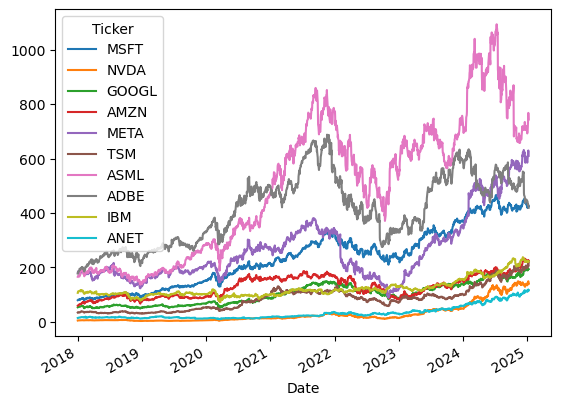

In [48]:
data_df.plot()

In the plot above we can see that almost all the companies suffer from a decline in their stock price inaround 2022 which could be due to COVID. A suggestion could be that the models and analysis is beeter to start after the COVID decline. 

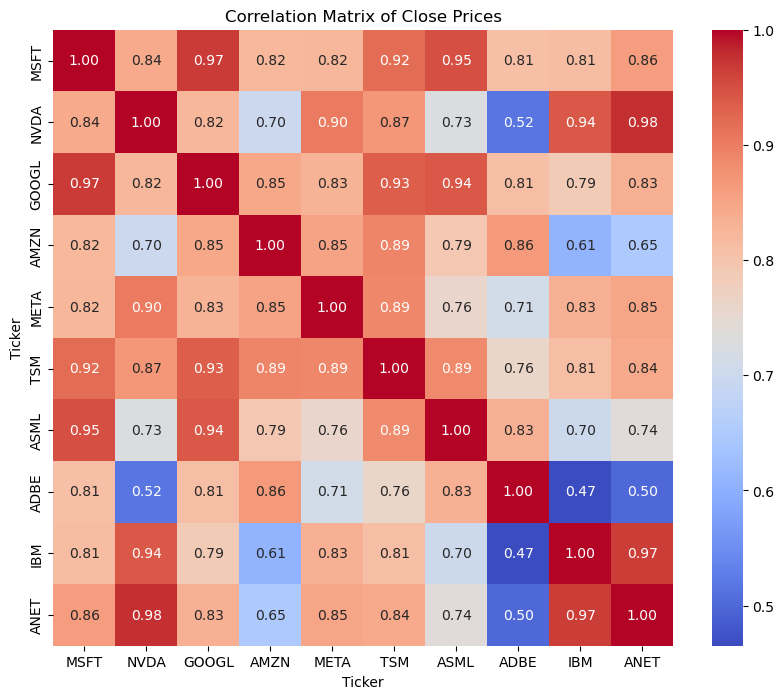

Ticker      MSFT      NVDA     GOOGL      AMZN      META       TSM      ASML  \
Ticker                                                                         
MSFT    1.000000  0.842071  0.966672  0.821458  0.823623  0.918570  0.949114   
NVDA    0.842071  1.000000  0.823186  0.698978  0.901868  0.868395  0.726881   
GOOGL   0.966672  0.823186  1.000000  0.846739  0.829599  0.934513  0.940401   
AMZN    0.821458  0.698978  0.846739  1.000000  0.853127  0.892447  0.794274   
META    0.823623  0.901868  0.829599  0.853127  1.000000  0.888898  0.758772   
TSM     0.918570  0.868395  0.934513  0.892447  0.888898  1.000000  0.886546   
ASML    0.949114  0.726881  0.940401  0.794274  0.758772  0.886546  1.000000   
ADBE    0.809860  0.516384  0.811545  0.864799  0.710719  0.761321  0.833007   
IBM     0.813869  0.940204  0.786181  0.606802  0.834045  0.811525  0.699293   
ANET    0.860654  0.976375  0.833577  0.648294  0.850747  0.844960  0.739786   

Ticker      ADBE       IBM      ANET  


In [50]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Close Prices")
plt.show()
print(correlation_matrix)

The stock prices are highly correlated to each other.